In [20]:
import numpy as np
import tensorflow as tf
import time
import os
import datetime
import keras
import io

import utils
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import sklearn.metrics
import itertools

### Exploracion de la base de datos

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Class 9 Ankle boot')

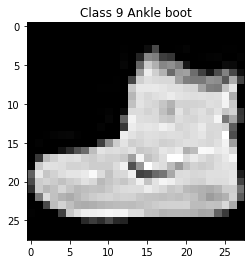

In [40]:
i = 0
plt.imshow(x_train[i], cmap='gray', interpolation='none')
plt.title(f"Class {y_train[i]} {class_names[y_train[i]]}")

In [32]:
x_train[i]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.12941176, 0.37647059,
        0.68627451, 0.61176471, 0.25098039, 0.05490196, 0.21176471,
        0.5372549 , 0.8       , 0.76078431, 0.4       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28627451, 0.72941176, 0.69411765, 0.71764706,
        0.68627451, 0.7372549 , 0.90980392, 1.        , 0.8745098 ,
        0.85882353, 0.76078431, 0.70196078, 0.72941176, 0.83529412,
        0.57254902, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1372549 , 0.63921569, 0.54901961, 0.58823529, 0.59607843,
        0.58823529, 0.57254902, 0.68627451, 0.68627451, 0.67843137,
        0.67058824, 0.6117

___

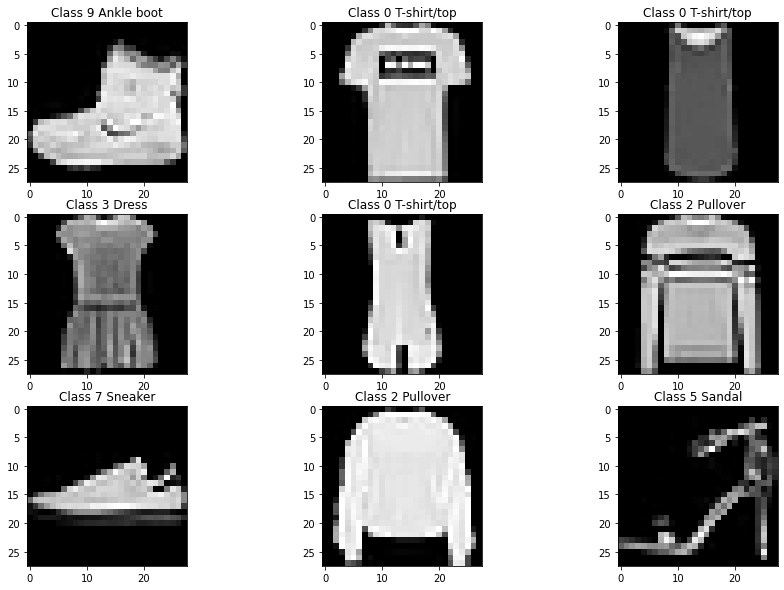

In [25]:
plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[i]} {class_names[y_train[i]]}")

### Costruimos el modelo

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Definimos la función de coste y el optimizador

In [33]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### Entrenamos el modelo

In [36]:
x_train.shape

(60000, 28, 28)

In [34]:
logdir = os.path.join("tutorial_3", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.fit(x=x_train, 
          y=y_train, 
          epochs=10,
          batch_size=100,
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.3952 - accuracy: 0.8633 - val_loss: 0.4439 - val_accuracy: 0.8447
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3923 - accuracy: 0.8670 - val_loss: 0.4425 - val_accuracy: 0.8460
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3987 - accuracy: 0.8619 - val_loss: 0.4437 - val_accuracy: 0.8451
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3848 - accuracy: 0.8673 - val_loss: 0.4445 - val_accuracy: 0.8439
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3929 - accuracy: 0.8669 - val_loss: 0.4445 - val_accuracy: 0.8454
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3937 - accuracy: 0.8647 - val_loss: 0.4386 - val_accuracy: 0.8472
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3840 - accuracy: 0.8665 - val_loss: 0.4380 - val_accuracy: 0.8461
Epoch 

___

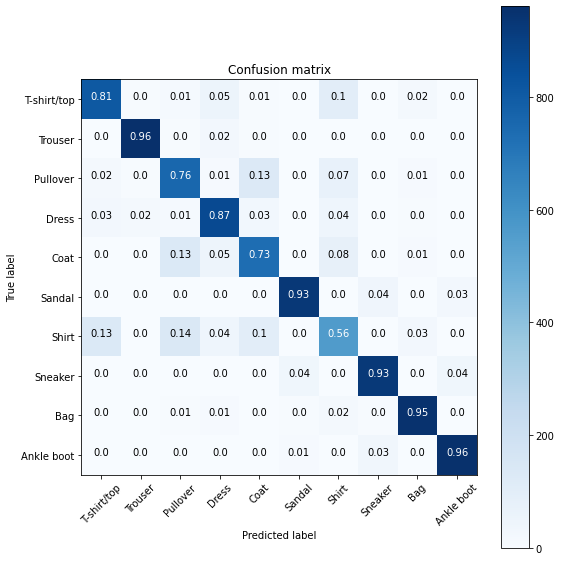

In [19]:
test_pred_raw = model.predict(x_test)
test_pred = np.argmax(test_pred_raw, axis=1)

import sklearn.metrics
import itertools

def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure


# Calculate the confusion matrix.
cm = sklearn.metrics.confusion_matrix(y_test, test_pred)
# Log the confusion matrix as an image summary.
figure = plot_confusion_matrix(cm, class_names=class_names)